In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes
import shapely.wkt
import pyproj

from shapely.geometry import Point

In [2]:
prop = pd.read_csv(r"C:\Users\RedRagon\Documents\ProjetoIntegrador1\Data\Real_State_Properati.csv",sep='\t')


In [3]:
prop.shape

(17223, 9)

In [4]:
prop.head(5)

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0


In [5]:
prop.isna().sum()

property_type          0
place_name             0
country_name           0
state_name             0
lat                    0
lon                    0
price                  0
currency               0
surface_total_in_m2    0
dtype: int64

In [6]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [7]:
for col in prop.columns:
    print(col, "-", len(prop[col].unique()))

property_type - 4
place_name - 62
country_name - 1
state_name - 1
lat - 9714
lon - 9704
price - 2754
currency - 2
surface_total_in_m2 - 568


In [8]:
prop['property_type'].unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [9]:
prop.groupby(by = 'property_type').count()['place_name'].sort_values(ascending = False)

property_type
apartment    14428
PH            1142
house          888
store          765
Name: place_name, dtype: int64

In [10]:
prop['property_type'].value_counts()/len(prop['property_type'])*100

apartment    83.771701
PH            6.630668
house         5.155896
store         4.441735
Name: property_type, dtype: float64

In [11]:
prop.groupby(by = 'currency').count()['place_name'].sort_values(ascending = False)

currency
USD    16700
ARS      523
Name: place_name, dtype: int64

In [12]:
prop['currency'].value_counts()/len(prop['currency'])*100

USD    96.963363
ARS     3.036637
Name: currency, dtype: float64

In [13]:
prop.drop(columns=['country_name','state_name'], inplace= True)

In [14]:
prop.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'price', 'currency',
       'surface_total_in_m2'],
      dtype='object')

In [15]:
prop["price_usd"] = prop.apply(lambda x: x["price"] if x["currency"] == "USD" else x["price"]/117.41,axis=1)

In [16]:
prop.drop(columns=['price','currency'], inplace= True)

In [17]:
prop["preco_metro2"] = prop.price_usd / prop.surface_total_in_m2

In [18]:
prop.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'surface_total_in_m2',
       'price_usd', 'preco_metro2'],
      dtype='object')

In [19]:
for i in prop.property_type.unique():
    print(i)
    print(prop.loc[prop.property_type == i,['preco_metro2']].describe())
    print('--------------------')

PH
       preco_metro2
count   1142.000000
mean    1695.710382
std      913.749082
min       18.370350
25%     1222.549020
50%     1625.000000
75%     2053.632764
max    25000.000000
--------------------
apartment
       preco_metro2
count  1.442800e+04
mean            inf
std             NaN
min    1.051501e+01
25%    2.018824e+03
50%    2.459016e+03
75%    3.018878e+03
max             inf
--------------------
house
       preco_metro2
count    888.000000
mean    1716.153891
std     1699.025955
min      214.592275
25%     1057.179184
50%     1451.163795
75%     1946.810507
max    23064.516129
--------------------
store
       preco_metro2
count    765.000000
mean    2794.266120
std     2139.406072
min        6.067020
25%     1454.545455
50%     2258.064516
75%     3538.461538
max    22000.000000
--------------------


In [20]:
for i in prop.property_type.unique():
    print(i)
    print(prop.loc[prop.property_type == i, 'preco_metro2'].std())
    print('--------------------')

PH
913.7490817204806
--------------------
apartment
nan
--------------------
house
1699.0259549644643
--------------------
store
2139.406071876024
--------------------


In [21]:
prop[(prop.property_type == 'apartment') & (prop.surface_total_in_m2 == 0)]

,property_type,place_name,lat,lon,surface_total_in_m2,price_usd,preco_metro2
2486,apartment,Palermo Soho,-34.589974,-58.425614,0.0,780000.0,inf
4872,apartment,Recoleta,-34.588818,-58.390648,0.0,320000.0,inf
5454,apartment,Caballito,-34.617348,-58.449404,0.0,68500.0,inf
6318,apartment,Palermo Hollywood,-34.582558,-58.432585,0.0,175000.0,inf
7170,apartment,Barracas,-34.641131,-58.369122,0.0,135000.0,inf
15888,apartment,Barrio Norte,-34.598727,-58.395851,0.0,112000.0,inf


In [22]:
prop.drop(index = list(prop[(prop.property_type == 'apartment') & (prop.surface_total_in_m2 == 0)].index),inplace = True)

In [23]:
for i in prop.property_type.unique():
    prop.drop(index = list(prop.loc[(prop.property_type == i) & (prop.preco_metro2 > 3*prop.preco_metro2.std())].index), inplace = True)

In [125]:
prop['Faixas_de_preco_m2'] = pd.qcut(x = prop.preco_metro2, q = 10, labels = [1,2,3,4,5,6,7,8,9,10])

In [126]:
prop

,property_type,place_name,lat,lon,surface_total_in_m2,price_usd,preco_metro2,geometry,property_place,avg_price_m2,Faixas_de_preco_m2
0,PH,Mataderos,-34.661824,-58.508839,55.0,62000.0,1127.272727,POINT (-58.50884 -34.66182),PH_Mataderos,1386.591733,1
1,apartment,Mataderos,-34.652262,-58.522982,55.0,72000.0,1309.090909,POINT (-58.52298 -34.65226),apartment_Mataderos,1776.706933,2
2,apartment,Belgrano,-34.559873,-58.443362,45.0,138000.0,3066.666667,POINT (-58.44336 -34.55987),apartment_Belgrano,2921.998257,9
3,apartment,Belgrano,-34.559873,-58.443362,65.0,195000.0,3000.000000,POINT (-58.44336 -34.55987),apartment_Belgrano,2921.998257,8
4,PH,Mataderos,-34.652356,-58.501624,140.0,239000.0,1707.142857,POINT (-58.50162 -34.65236),PH_Mataderos,1386.591733,2
...,...,...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,-34.599214,-58.402519,91.0,165000.0,1813.186813,POINT (-58.40252 -34.59921),apartment_Barrio Norte,2995.063759,3
17219,apartment,Recoleta,-34.587425,-58.397372,44.0,165000.0,3750.000000,POINT (-58.39737 -34.58743),apartment_Recoleta,3164.006018,10
17220,apartment,Belgrano,-34.563685,-58.442683,157.0,410000.0,2611.464968,POINT (-58.44268 -34.56369),apartment_Belgrano,2921.998257,7
17221,apartment,Belgrano,-34.563685,-58.442683,157.0,410000.0,2611.464968,POINT (-58.44268 -34.56369),apartment_Belgrano,2921.998257,7


In [24]:
df_bairros = pd.read_csv("Data/Neighborhoods.csv", encoding = 'latin1')
df_bairros.head()

,WKT,NEIGHBORHOOD,COMMUNE,PERIMETER,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [25]:
df_bairros["WKT"] = df_bairros["WKT"].apply(shapely.wkt.loads)
geo_bairros = gpd.GeoDataFrame(df_bairros, geometry = 'WKT' )
type(geo_bairros)

geopandas.geodataframe.GeoDataFrame

C:\Users\RedRagon\anaconda3\envs\ProjetoIntegrador2\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\RedRagon\anaconda3\envs\ProjetoIntegrador2\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

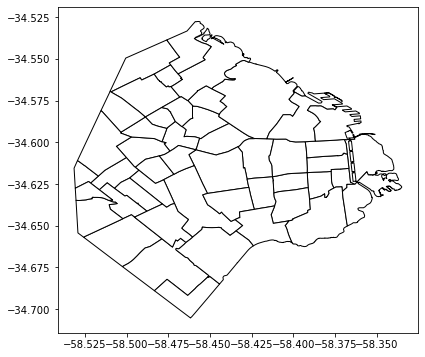

In [26]:
geo_bairros.plot(color = 'white', edgecolor='black', figsize=(10,6))

In [27]:
geometria = gpd.points_from_xy(prop['lon'],prop['lat'])

C:\Users\RedRagon\anaconda3\envs\ProjetoIntegrador2\lib\site-packages\geopandas\array.py:253: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [28]:
prop = gpd.GeoDataFrame(prop,
                        geometry = geometria
                        )

In [29]:
prop.loc[ : , ['geometry', 'lat', 'lon', 'property_type', 'place_name']]

,geometry,lat,lon,property_type,place_name
0,POINT (-58.50884 -34.66182),-34.661824,-58.508839,PH,Mataderos
1,POINT (-58.52298 -34.65226),-34.652262,-58.522982,apartment,Mataderos
2,POINT (-58.44336 -34.55987),-34.559873,-58.443362,apartment,Belgrano
3,POINT (-58.44336 -34.55987),-34.559873,-58.443362,apartment,Belgrano
4,POINT (-58.50162 -34.65236),-34.652356,-58.501624,PH,Mataderos
...,...,...,...,...,...
17218,POINT (-58.40252 -34.59921),-34.599214,-58.402519,apartment,Barrio Norte
17219,POINT (-58.39737 -34.58743),-34.587425,-58.397372,apartment,Recoleta
17220,POINT (-58.44268 -34.56369),-34.563685,-58.442683,apartment,Belgrano
17221,POINT (-58.44268 -34.56369),-34.563685,-58.442683,apartment,Belgrano


In [30]:
prop.sort_values(by='lat').head(5)

,property_type,place_name,lat,lon,surface_total_in_m2,price_usd,preco_metro2,geometry
4202,apartment,Mataderos,-38.416097,-63.616672,70.0,45000.0,642.857143,POINT (-63.61667 -38.41610)
6026,PH,Villa Lugano,-34.694365,-58.467574,301.0,235000.0,780.730897,POINT (-58.46757 -34.69436)
6027,PH,Villa Lugano,-34.694365,-58.467574,301.0,235000.0,780.730897,POINT (-58.46757 -34.69436)
5079,house,Villa Riachuelo,-34.694051,-58.470120,260.0,200000.0,769.230769,POINT (-58.47012 -34.69405)
3274,PH,Villa Riachuelo,-34.693859,-58.467008,122.0,150000.0,1229.508197,POINT (-58.46701 -34.69386)


In [31]:
prop['property_place'] = prop['property_type'] + '_' + prop['place_name']

In [32]:
prop['avg_price_m2'] = prop.groupby('property_place')['preco_metro2'].transform('mean')

In [127]:
prop.head(2)

,property_type,place_name,lat,lon,surface_total_in_m2,price_usd,preco_metro2,geometry,property_place,avg_price_m2,Faixas_de_preco_m2
0,PH,Mataderos,-34.661824,-58.508839,55.0,62000.0,1127.272727,POINT (-58.50884 -34.66182),PH_Mataderos,1386.591733,1
1,apartment,Mataderos,-34.652262,-58.522982,55.0,72000.0,1309.090909,POINT (-58.52298 -34.65226),apartment_Mataderos,1776.706933,2


C:\Users\RedRagon\anaconda3\envs\ProjetoIntegrador2\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\RedRagon\anaconda3\envs\ProjetoIntegrador2\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\RedRagon\anaconda3\envs\ProjetoIntegrador2\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
C:\U

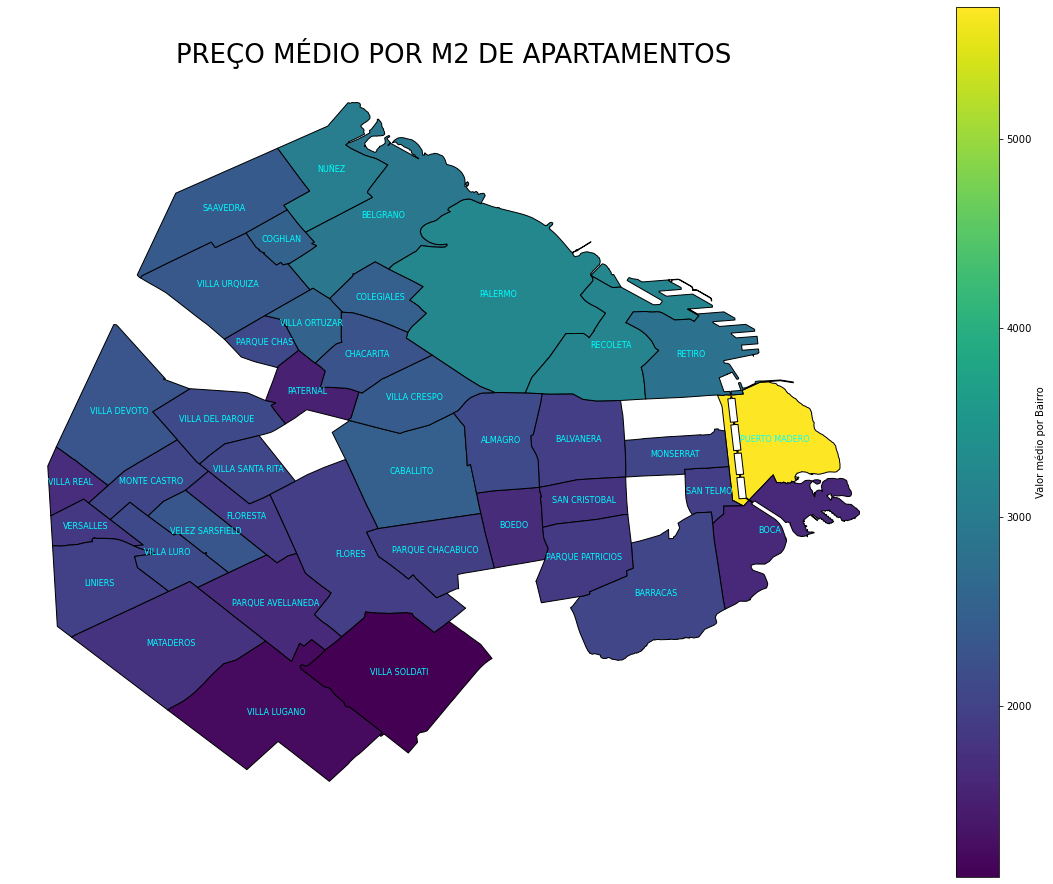

In [128]:
df_apart = prop.loc[ : , ['property_type', 'place_name', 'avg_price_m2']]

avg_bairro_apart = df_apart.loc[df_apart['property_type'] == 'apartment']
avg_bairro_apart['place_name'] = avg_bairro_apart['place_name'].str.upper()

geodata_apart = pd.merge(left=avg_bairro_apart, right=df_bairros, left_on='place_name', right_on='NEIGHBORHOOD', how='inner')
geodata_apart = geodata_apart.rename(columns={"WKT": "geometry"})
geodata_apart = geodata_apart.drop(columns=['NEIGHBORHOOD','COMMUNE','PERIMETER','AREA'])
geodata_apart = geodata_apart.drop_duplicates(subset=['place_name'])

geodf_apart = gpd.GeoDataFrame(geodata_apart)

ax = geodf_apart.loc[geodf_apart['property_type'] == 'apartment'].plot(
    figsize=(20,16),
    edgecolor='black',column='avg_price_m2',
    legend=True,
    legend_kwds={'label': "Valor médio por Bairro",'orientation':"vertical" })

for i in geodf_apart.index:
    plt.text(geodf_apart.geometry.centroid[i].coords[0][0], geodf_apart.geometry.centroid[i].coords[0][1], geodf_apart.place_name[i],
             fontsize=8, horizontalalignment='center', verticalalignment='center', color = 'cyan')
    
ax.set_axis_off();
ax.set_title("PREÇO MÉDIO POR M2 DE APARTAMENTOS",fontsize=26);

In [179]:
aa = prop[prop.place_name == 'Retiro']
a = aa[aa.property_type == 'apartment']
bb = prop[prop.place_name == 'Recoleta']
b = bb[bb.property_type == 'apartment']
cc = prop[prop.place_name == 'Palermo']
c = cc[cc.property_type == 'apartment']
dd = prop[prop.place_name == 'Belgrano']
d = dd[dd.property_type == 'apartment']
ee = prop[prop.place_name == 'Nuñez']
e = ee[ee.property_type == 'apartment']
df_analise = pd.concat([a,b,c,d,e])
cols = ['geometry','price_usd', 'preco_metro2','avg_price_m2']
dff = df_analise.drop(cols, axis = 1) 
df212 = dff.sort_values(by='place_name')
dummiess = pd.get_dummies(df212.place_name)
data22 = pd.concat([df212, dummiess],axis=1)
dfff = data22.drop(columns = ['property_place','place_name','property_type','lat','lon'])
dumis = pd.get_dummies(dfff.Faixas_de_preco_m2)
data3 = pd.concat([dfff,dumis],axis=1)
df5= data3.sort_values(by='Faixas_de_preco_m2')
df5

,surface_total_in_m2,Faixas_de_preco_m2,Belgrano,Nuñez,Palermo,Recoleta,Retiro,1,2,3,4,5,6,7,8,9,10
9599,37.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5739,190.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
16931,37.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
16932,39.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
16933,117.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5306,300.0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
14917,41.0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3089,307.0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
10808,74.0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


df_analise.price_usd.describe()

In [196]:
prop


,property_type,place_name,lat,lon,surface_total_in_m2,price_usd,preco_metro2,geometry,property_place,avg_price_m2,Faixas_de_preco_m2
0,PH,Mataderos,-34.661824,-58.508839,55.0,62000.0,1127.272727,POINT (-58.50884 -34.66182),PH_Mataderos,1386.591733,1
1,apartment,Mataderos,-34.652262,-58.522982,55.0,72000.0,1309.090909,POINT (-58.52298 -34.65226),apartment_Mataderos,1776.706933,2
2,apartment,Belgrano,-34.559873,-58.443362,45.0,138000.0,3066.666667,POINT (-58.44336 -34.55987),apartment_Belgrano,2921.998257,9
3,apartment,Belgrano,-34.559873,-58.443362,65.0,195000.0,3000.000000,POINT (-58.44336 -34.55987),apartment_Belgrano,2921.998257,8
4,PH,Mataderos,-34.652356,-58.501624,140.0,239000.0,1707.142857,POINT (-58.50162 -34.65236),PH_Mataderos,1386.591733,2
...,...,...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,-34.599214,-58.402519,91.0,165000.0,1813.186813,POINT (-58.40252 -34.59921),apartment_Barrio Norte,2995.063759,3
17219,apartment,Recoleta,-34.587425,-58.397372,44.0,165000.0,3750.000000,POINT (-58.39737 -34.58743),apartment_Recoleta,3164.006018,10
17220,apartment,Belgrano,-34.563685,-58.442683,157.0,410000.0,2611.464968,POINT (-58.44268 -34.56369),apartment_Belgrano,2921.998257,7
17221,apartment,Belgrano,-34.563685,-58.442683,157.0,410000.0,2611.464968,POINT (-58.44268 -34.56369),apartment_Belgrano,2921.998257,7


In [186]:
print('min:',2.044119e+03)
print('max:',3200000.0)

min: 2044.119
max: 3200000.0


2000 - 30000

30000 - 100000

100000 - 200000

200000 - infinito

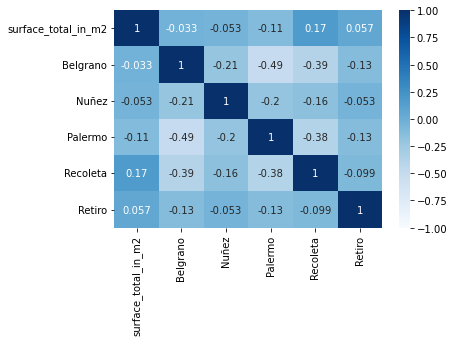

In [131]:
sns.heatmap(dfff.corr(), 
            annot = True, 
            vmin = -1, 
            cmap = 'Blues'
            );


In [110]:
feature_cols = ['Belgrano', 'Nuñez', 'Palermo', 'Recoleta', 'Retiro']
X = df[feature_cols]
y = df.surface_total_in_m2
print('X:',X.shape)
print('y:',y.shape)


X: (4073, 5)
y: (4073,)


In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
linreg = LinearRegression()

In [113]:
linreg.fit(X, y)

LinearRegression()

In [114]:
print (linreg.intercept_)
print (linreg.coef_)

-4498004264055.135
[4.49800426e+12 4.49800426e+12 4.49800426e+12 4.49800426e+12
 4.49800426e+12]


In [115]:
import numpy as np
test = [100,0,0,0,1]
test_sklearn = np.array(test).reshape(-5, 5)

linreg.predict(test_sklearn)

C:\Users\RedRagon\anaconda3\envs\ProjetoIntegrador2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.49800426e+14])

In [116]:
list(zip(feature_cols, linreg.coef_))

[('Belgrano', 4498004264153.652),
 ('Nuñez', 4498004264142.428),
 ('Palermo', 4498004264144.469),
 ('Recoleta', 4498004264183.05),
 ('Retiro', 4498004264183.326)]

In [117]:
pred = linreg.predict(X)

In [118]:
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(y, pred))
print ('MSE:', metrics.mean_squared_error(y, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y, pred)))
print ('R2:', metrics.r2_score(y, pred))

MAE: 55.43735566152099
MSE: 6378.672073122151
RMSE: 79.8665892167817
R2: 0.037348936568558644
